In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display

In [2]:
n_data = torch.ones(100, 1)

In [3]:
x1 = torch.normal(3*n_data, 2)
x2 = torch.normal(-3*n_data, 2)
x3 = torch.normal(0*n_data, 1)
x4 = torch.normal(-2*n_data, 1)
x5 = torch.normal(0*n_data, 1)
x6 = torch.normal(0*n_data, 1)

In [4]:
y1 = torch.normal(3*n_data, 2)
y2 = torch.normal(-3*n_data, 2)
y3 = torch.normal(2*n_data, 1)
y4 = torch.normal(n_data, 1)
y5 = torch.normal(-2*n_data, 1)
y6 = torch.normal(0*n_data, 1)

In [5]:
z1 = torch.zeros(100)
z2 = torch.ones(100)
z3 = 2*z2
z4 = 3*z2
z5 = 4*z2
z6 = 5*z2

In [6]:
x11 = torch.cat((x1, x2, x3, x4, x5, x6), 0).type(torch.FloatTensor)
x22 = torch.cat((y1, y2, y3, y4, y5, y6), 0).type(torch.FloatTensor)
x = torch.cat((x11, x22), 1).type(torch.FloatTensor)
y = torch.cat((z1, z2, z3, z4, z5, z6), 0).type(torch.LongTensor)
x, y = Variable(x), Variable(y)


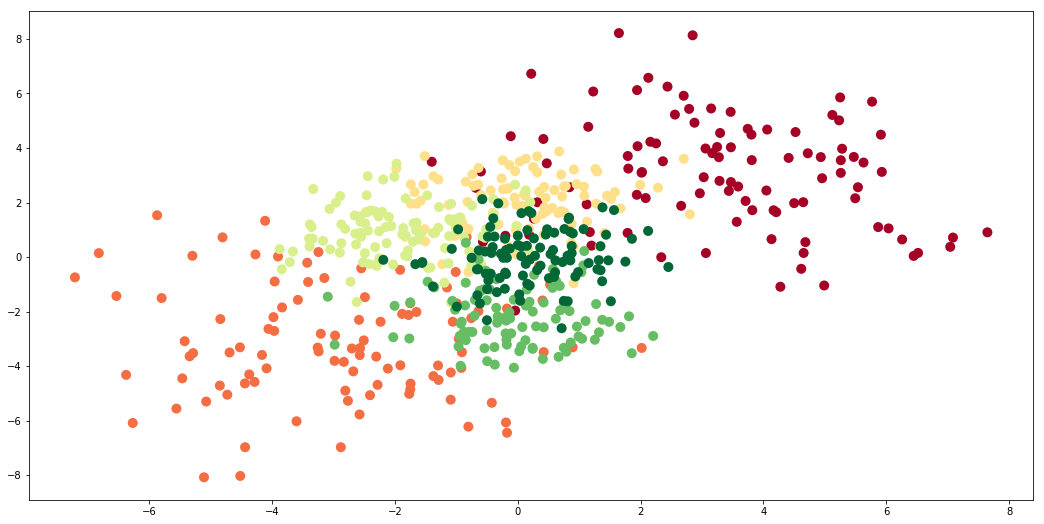

In [7]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [8]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.hidden3 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.sigmoid(self.hidden3(x))
        x = self.predict(x)
        return x

In [9]:
net = Net(2, 16, 6)

In [10]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

In [11]:
epoch = 0

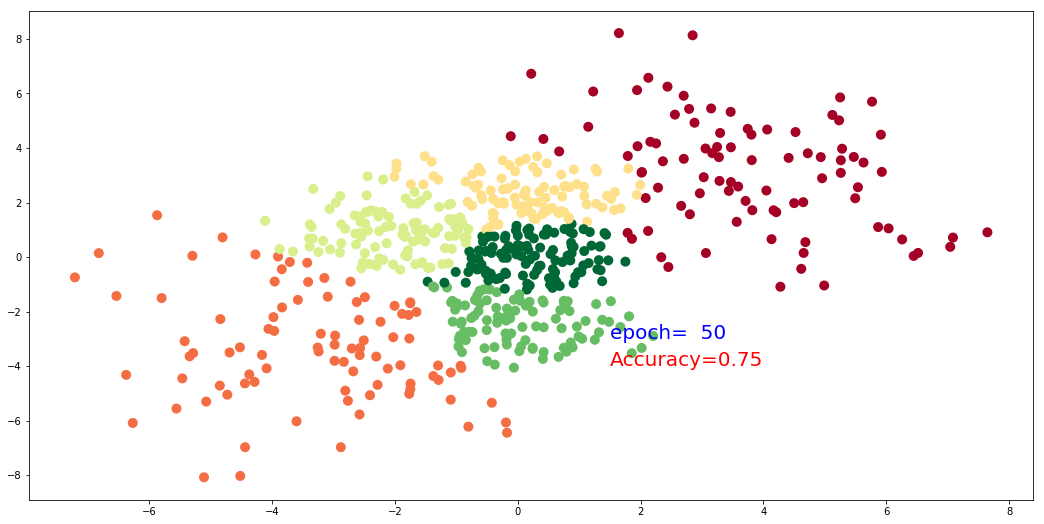

In [12]:
for t in range(50):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    epoch = epoch + 1
    display.clear_output(wait=True)
    plt.figure(figsize=(18,9))
    prediction = torch.max(F.softmax(out), 1)[1]   
    pred_y = prediction.data.numpy().squeeze()
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y)/600.
    plt.text(1.5, -3, 'epoch=%4d' % epoch, fontdict={'size':20, 'color': 'blue'})
    plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)